# Soft Computing

## Tugas 1: Multilayer Perceptron

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas1_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- tensorflow/keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Hampir setiap orang yang belajar tentang neural networks atau deep learning selalu memulai dari dataset [MNIST](http://yann.lecun.com/exdb/mnist/). Dataset ini terdiri dari gambar angka dari 0-9 dengan pembagian: 60,000 data latih dan 10,000 data uji. Setiap gambar telah diproses agar memiliki dimensi yang sama dan diletakkan di pertengahan. Deskripsi lebih lanjut tentang dataset ini dapat Anda lihat di [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database).

Untuk memudahkan pengerjaan tugas ini, dataset hanya dibagi menjadi dua: **training set** dan **test set**.

### Mengimpor Modul dan Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 143s 12us/step


## 1. Eksplorasi Awal Data (10 poin)

Pada bagian ini, kecuali dijelaskan lebih rinci, dataset yang Anda harusnya gunakan adalah `x_train`.

### Soal 1.1 (2 poin)

Tunjukkan dimensi dari data latih dan data uji.

In [4]:
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print (x_test.shape)
print (y_test.shape)

(10000, 28, 28)
(10000,)


### Soal 1.2 (4 poin)

Ambil 1 contoh gambar dari masing-masing kelas, lalu gambarkan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

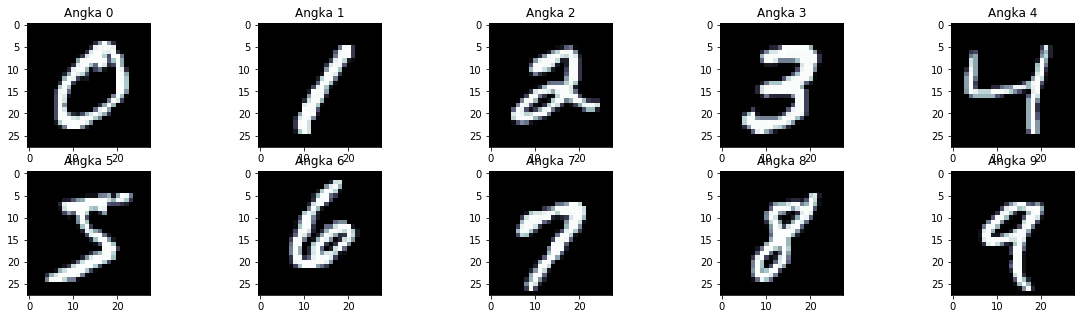

In [6]:
no_class = 10
fig, axes = plt.subplots(2,5,figsize=(20,5))
for ax, i in zip(axes.flatten(), range(no_class)):
    index = np.where(y_train==i)
    ax.set_title('Angka {}'.format(i))
    ax.imshow(x_train[index][0].reshape(28,28), cmap='bone')
plt.show()

### Soal 1.3 (2 poin)

Ambil nilai rata-rata tiap pixel dari setiap kelas, lalu gambarkan.

*Petunjuk: Anda akan menghasilkan 10 gambar, yaitu rata-rata gambar 0, 1, 2, dst. Jika Anda menggunakan cara yang benar, seharusnya Anda hanya perlu mengganti dua baris dari kode yang Anda kerjakan pada soal 1.2.*

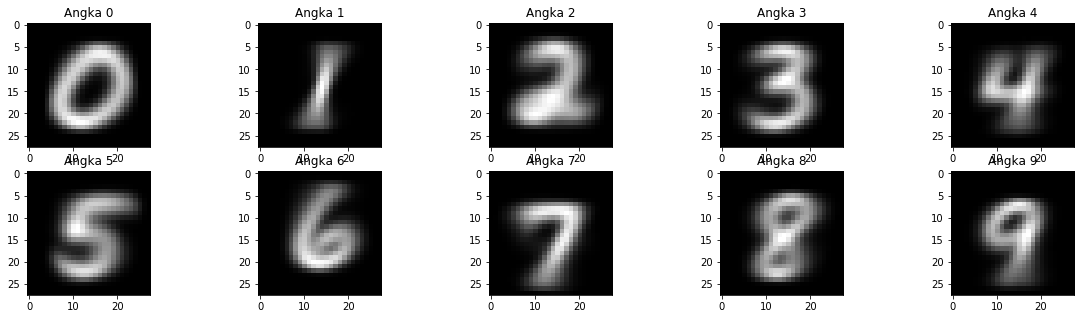

In [7]:
fig, axes = plt.subplots(2,5,figsize=(20,5))
for ax, i in zip(axes.flatten(), range(no_class)):
    index = np.where(y_train==i)
    ax.set_title('Angka {}'.format(i))
    ax.imshow(x_train[index].mean(axis=0).reshape(28,28), cmap='gray')
plt.show()

### Soal 1.4 (2 poin)

Gambarkan grafik berupa garis yang sumbu horizontalnya adalah indeks pixel (0-783) dan sumbu vertikalnya adalah nilai rata-rata dari pixel tersebut. Apa yang dapat Anda perhatikan?

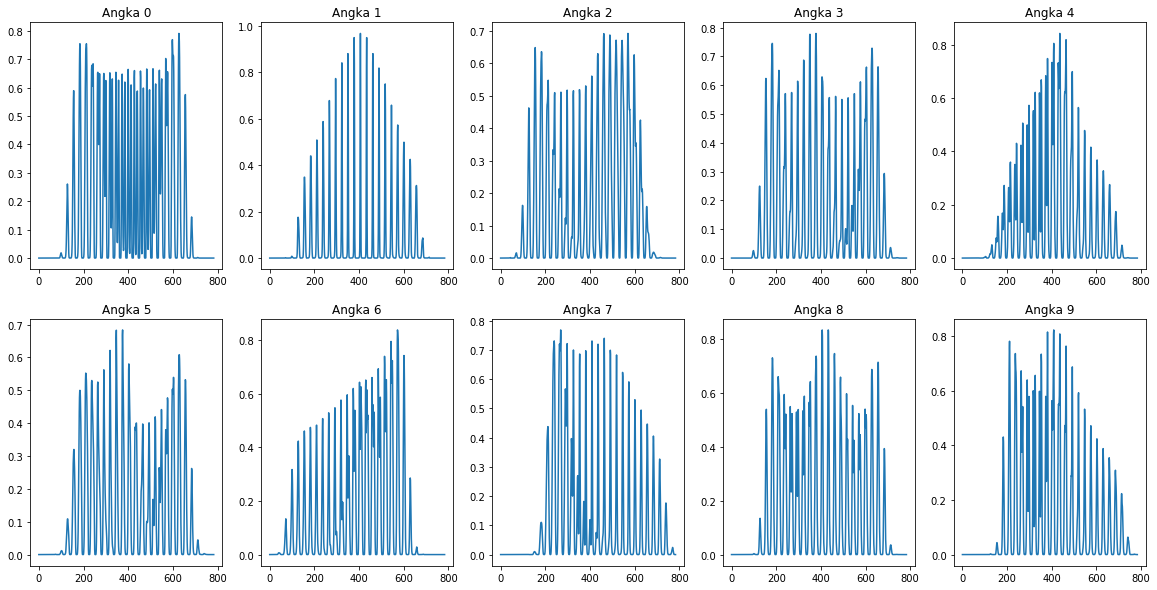

In [16]:
fig, axes = plt.subplots(2,5,figsize=(20,10))
for ax, i in zip(axes.flatten(), range(no_class)):
    index = np.where(y_train==i)
    graph = x_train[index].mean(axis=0).reshape(28*28)
    ax.set_title('Angka {}'.format(i))
    line, = ax.plot(graph)
plt.show()

## 2. Preprocessing (5 poin)

### Soal 2.1 (2 poin)

Karena nilai pixel sudah ada di rentang [0,255], transformasikan setiap gambar dengan membagi nilainya dengan 255 agar menjadi [0,1].

In [9]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
pd.DataFrame(x_train[:5])

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Soal 2.2 (2 poin)

Saat ini, kelas dalam `y_train` masih berupa nilai [0,9]. Ubah nilainya menjadi one-hot-encoder. Anda dapat menggunakan fungsi `tf.keras.utils.to_categorical`.

In [10]:
y_train2 = tf.keras.utils.to_categorical(y_train,no_class)
y_test2 = tf.keras.utils.to_categorical(y_test,no_class)
pd.DataFrame(y_train2[:5])

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Soal 2.3 (1 poin)

Tuliskan rumus fungsi softmax yang nanti akan digunakan dalam kasus klasifikasi MNIST.

$$
\hat{y}_k = \frac{\exp(a_k)}{\sum_{c=1}^K \exp(a_c)}
$$

In [11]:
def softmax(): 
  tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

### 3. Klasifikasi dengan Regresi Logistik (15 poin)

### Soal 3.1 (2 poin)

Buatlah model **regresi logistik** dengan fungsi softmax sebagai keluarannya dengan hanya menggunakan TensorFlow/Keras. Anda tidak diperkenankan menggunakan pustaka scikit-learn untuk menghasilkan model regresi logistik.

*Petunjuk: Apa representasi regresi logistik jika dilihat dari sudut pandang neural networks?*

In [12]:
def logreg(x):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(784,)))
    model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

### Soal 3.2 (3 poin)

Latih model yang telah Anda buat dengan *training set*. Gunakan Adam sebagai optimizer dari model Anda, `categorical_crossentropy` sebagai *loss function*, 10 epochs, dan akurasi sebagai *metric*. Berapa persen akurasi pada data latih dari model yang dihasilkan?

In [13]:
np.random.seed(42)

batch_size = 128
x = 10
epochs = 10

model = logreg(x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train2, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test2))
score = model.evaluate(x_test, y_test2, verbose=0)
print('Test loss: {:.2f}'.format(score[0]))
print('Test accuracy: {:.2%}'.format(score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5715 - acc: 0.8645 - val_loss: 0.3022 - val_acc: 0.9146
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2720 - acc: 0.9243 - val_loss: 0.2372 - val_acc: 0.9337
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2178 - acc: 0.9379 - val_loss: 0.2003 - val_acc: 0.9424
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1832 - acc: 0.9483 - val_loss: 0.1723 - val_acc: 0.9507
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1571 - acc: 0.9552 - val_loss: 0.1544 - val_acc: 0.9544
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1373 - acc: 0.9614 - val_loss: 0.1386 - val_acc: 0.9

### Soal 3.3 (3 poin)

Evaluasi model Anda pada *test set*. Berapa akurasi yang didapatkan? Gambarkan pula *confusion matrix* dari prediksi yang Anda hasilkan terhadap nilai yang sebenarnya.

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(x_test, y_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

### Soal 3.4 (2 poin)

Ambil satu gambar angka 8 dari data uji. Lalu prediksi menggunakan model yang telah Anda buat. Tampilkan probabilitas dari masing-masing kelas dari hasil prediksi model Anda.

In [ ]:
np.random.seed(42)

# Kode Anda di sini

### Soal 3.5 (2 poin)

Latih kembali model regresi logistik Anda dengan konfigurasi seperti pada soal 3.2. Namun, ubah nilai `epochs` menjadi 50. Lalu, gambarkan *learning curve*-nya dengan menambahkan data uji sebagai parameter `validation_data` dari `model.fit()`.

In [ ]:
np.random.seed(42)

batch_size = 128
x = 10
epochs = 50

model = logreg(x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train2, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test2))
score = model.evaluate(x_test, y_test2, verbose=0)
print('Test loss: {:.2f}'.format(score[0]))
print('Test accuracy: {:.2%}'.format(score[1]))

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,51), history.history['acc'], label='Training Set')
plt.plot(range(1,51), history.history['val_acc'], label='Test Set')
plt.plot(range(1,51), history.history['val_acc'], label='Validation Set')
plt.xticks(range(1,51), range(1,51), range(1,51))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();


### Soal 3.6 (3 poin)

Berikan kesimpulan Anda dari hasil yang Anda dapatkan sejauh ini.

Semakin banyak epoch, maka akan nilai loss akan semakin mendekati 0 atau bahkan sampai 0, dan nilai akurasinya akan semakin mendekati 1 atau bahkan sampai 1

Referensi : <br>https://github.com/aliakbars/uai-soft-computing/blob/a060139f5e537a78735b6ddfd4724e72edf09463/scripts/lab1.ipynb</br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
https://www.datacamp.com/community/tutorials/deep-learning-python

## 4. Multilayer Perceptron: Wide vs Deep (20 poin)

Mana yang lebih baik: model yang melebar atau mendalam?

### Soal 4.1 (2 poin)

Buatlah model *neural network* dengan satu *hidden layer* yang terdiri dari 800 *hidden units*. Gunakan fungsi aktivasi ReLU pada *hidden layer* dan softmax pada *output layer*.

In [ ]:
def wide_net():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(800, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

model = wide_net()
model.summary()

### Soal 4.2.a (6 poin)

Jika kita ingin membandingkan model *neural networks*, ada baiknya jika jumlah parameter yang digunakan sama banyaknya. Oleh karena itu, sebagai perbandingan dari arsitektur yang telah Anda buat pada soal 4.1, buatlah tiga model *neural networks* yang bersifat mendalam dengan 2, 3, dan 4 *hidden layers*. Untuk mempermudah, gunakan jumlah *hidden units* yang sama di tiap *hidden layer*.

In [ ]:
def deep_net_2():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(500, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(500, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

def deep_net_3():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(400, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(400, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(400, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

def deep_net_4():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(350, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(350, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(350, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(350, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = deep_net_2()
model.summary()

In [ ]:
model = deep_net_3()
model.summary()

In [ ]:
model = deep_net_4()
model.summary()

### Soal 4.2.b (4 poin)

Tuliskan perhitungan yang Anda gunakan untuk menghasilkan jumlah *hidden units* pada masing-masing *hidden layers* untuk soal 4.2.a. Perhatikan bahwa jumlah parameternya tidak harus persis sama, tetapi bisa mendekati.

*Petunjuk: Anda mungkin akan memerlukan rumus:*
\begin{align}
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
\end{align}

*Jawaban Anda di sini*

### Soal 4.3 (4 poin)

Latihlah setiap arsitektur yang telah Anda definisikan di atas. Gambarkan pula *learning curves* yang dihasilkan pada satu gambar.

In [ ]:
np.random.seed(42)

batch_size = 128
x = 10
epochs = 50

model = logreg(x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train2, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test2))
score = model.evaluate(x_test, y_test2, verbose=0)
print('Test loss: {:.2f}'.format(score[0]))
print('Test accuracy: {:.2%}'.format(score[1]))

### Soal 4.4 (4 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah Anda lakukan pada tugas ini.

Dari tugas ini, dapat diketahui bahwa deep network lebih baik daripada wide network, karena deep network 

Referensi :
<br>https://www.tensorflow.org/tutorials/